<a href="https://colab.research.google.com/github/shivanipadal/Web-Scraping/blob/main/BigbossTeluguVotes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
import requests
from bs4 import BeautifulSoup


In [ ]:
url="https://www.biggbossteluguvoteonline.in/"

BigBoss=requests.get(url)

soup=BeautifulSoup(BigBoss.text)
print(soup)

In [ ]:
uiname=soup.findAll('ul')
#print(uiname)
links=soup.findAll('li')
print(links)

In [ ]:
import re
pat=re.compile("votes")
names=[]
vote=[]

for items in links :
  text=items.text
  if re.search(pat,text) :
    if re.search('%',text) :
      print(text)
      name=text.split(":")[0]
      votes=re.search('(\d+ votes)',text.split(":")[1])
      #print(votes.groups())
      novotes=votes.groups()[0].split()[0]
      #print(novotes)
      names.append(name)
      vote.append(novotes)

print(names)
print(vote)


In [ ]:
import pandas as pd
rows=[]
rows.append(names)
rows.append(vote)

df=pd.DataFrame(rows)

print(df)

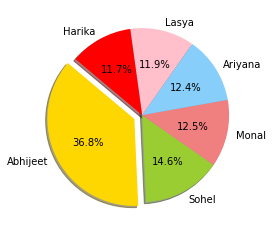

In [73]:
import matplotlib.pyplot as plt
explode = (0.1, 0, 0, 0,0,0) 

colours=['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','pink','red']
plt.pie(vote,labels=names,explode=explode,colors=colours,autopct='%1.1f%%',shadow=True,startangle=140)
#plt.axis('equal')
plt.show()
